# Question 1,2,3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Housing-01.csv')
data

,Price,Area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420
...,...,...
540,1820000,3000
541,1767150,2400
542,1750000,3620
543,1750000,2910


In [3]:
data.tail()

,Price,Area
540,1820000,3000
541,1767150,2400
542,1750000,3620
543,1750000,2910
544,1750000,3850


In [4]:
data.head()

,Price,Area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420


In [5]:
data.isna().sum()

Price    0
Area     0
dtype: int64

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Area'}>]], dtype=object)

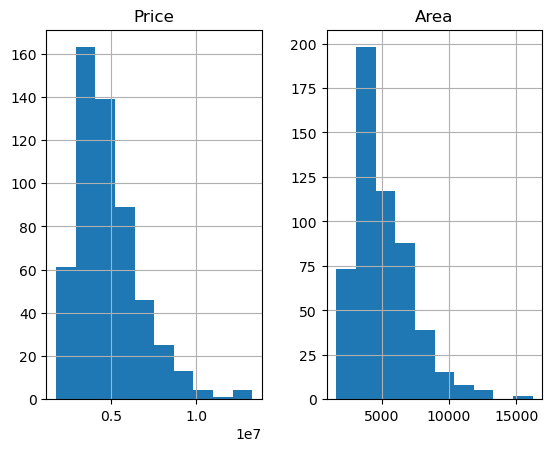

In [6]:
data.hist()

In [7]:
data.describe()

,Price,Area
count,5.450000e+02,545.000000
mean,4.766729e+06,5150.541284
std,1.870440e+06,2170.141023
min,1.750000e+06,1650.000000
25%,3.430000e+06,3600.000000
50%,4.340000e+06,4600.000000
75%,5.740000e+06,6360.000000
max,1.330000e+07,16200.000000


In [8]:
data.head(1)

,Price,Area
0,13300000,7420


In [9]:
x=data.iloc[:,:-1]
x.head(2)

,Price
0,13300000
1,12250000


In [50]:
y=data.iloc[:,-1:]
y.head(2)

,Area
0,7420
1,8960


In [51]:
a=data.iloc[:,:-1].values
b=data.iloc[:,-1].values
print(type(a),type(b))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [52]:
data.corr()

,Price,Area
Price,1.000000,0.535997
Area,0.535997,1.000000


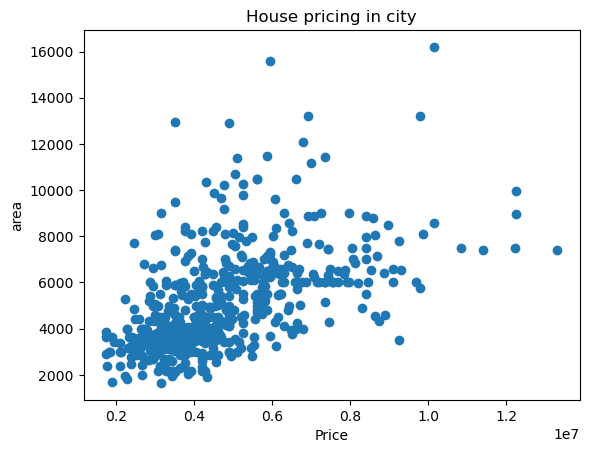

In [53]:
#visualize the dataset
plt.scatter(x,y)
plt.title('House pricing in city')
plt.xlabel('Price')
plt.ylabel('area')
plt.show()

In [94]:
import sklearn 
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size=0.2,random_state =1)

In [95]:
data.shape

(545, 2)

In [96]:
xtrain.shape

(436, 1)

In [97]:
xtest

,Price
62,7070000
247,4550000
142,5600000
107,6125000
483,2940000
...,...
201,4900000
92,6405000
66,6930000
284,4270000


In [98]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
#Train the data
print('Training started............\n')
print()
lin_reg.fit(xtrain,ytrain)
print()
print('Training complete........\n')
print()
#test the data
print('Testing invoked......\n')
ypred = lin_reg.predict(xtest)
print('Predicted Total Payment\n',ypred)
print(' \n Testing is also completed....\n')

Training started............



Training complete........


Testing invoked......

Predicted Total Payment
 [[ 6638.20017493]
 [ 5039.09953217]
 [ 5705.39146665]
 [ 6038.5374339 ]
 [ 4017.4518993 ]
 [ 4550.48544689]
 [ 3706.51566321]
 [ 6904.71694872]
 [ 4017.4518993 ]
 [ 6238.42501424]
 [ 3928.6129747 ]
 [ 4261.75894194]
 [ 5838.64985355]
 [ 5927.48877815]
 [ 6527.15151918]
 [10591.53231952]
 [ 4461.64652229]
 [ 3973.032437  ]
 [ 5616.55254206]
 [ 3351.15996482]
 [ 4550.48544689]
 [ 5705.39146665]
 [ 3839.77405011]
 [ 4461.64652229]
 [ 3795.35458781]
 [ 5483.29415516]
 [ 3706.51566321]
 [ 6549.36125033]
 [ 8370.55920458]
 [ 4328.38813539]
 [ 7126.81426022]
 [ 5927.48877815]
 [ 4328.38813539]
 [ 4017.4518993 ]
 [ 6016.32770275]
 [ 5083.51899447]
 [ 5034.65758594]
 [ 4195.1297485 ]
 [ 5838.64985355]
 [ 5172.35791907]
 [ 4283.96867309]
 [ 4017.4518993 ]
 [ 3706.51566321]
 [ 4932.49282266]
 [ 7304.49210941]
 [ 5238.98711252]
 [ 4817.00222068]
 [ 4817.00222068]
 [ 4239.54921079]
 [ 4128.50

In [99]:
ytest

,Area
62,6240
247,8400
142,10500
107,6420
483,6615
...,...
201,4095
92,4800
66,13200
284,7770


In [100]:
diff= ytest-ypred
diff

,Area
62,-398.200175
247,3360.900468
142,4794.608533
107,381.462566
483,2597.548101
...,...
201,-1166.196844
92,-1416.215283
66,6650.638750
284,2908.578317


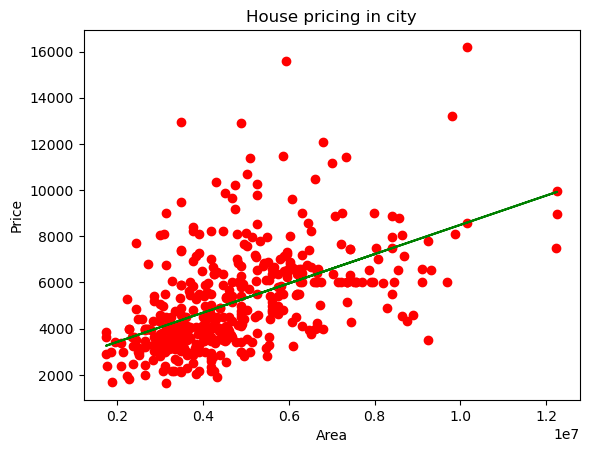

In [101]:
#Visualize the training dataset
plt.scatter(xtrain,ytrain,color='red')
plt.plot(xtrain,lin_reg.predict(xtrain),color='green')
plt.title('House pricing in city')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

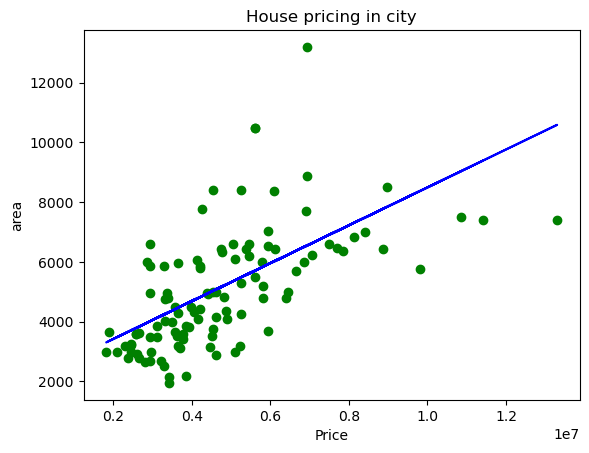

In [102]:
#Visualize the test dataset
plt.scatter(xtest,ytest,color='green')
plt.plot(xtest,lin_reg.predict(xtest),color='blue')
plt.title('House pricing in city')
plt.xlabel('Price')
plt.ylabel('area')
plt.show()

In [103]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

print('Mean Squared Error: \t',mean_squared_error(ytest,ypred))
print()
print('RMES: \t ',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('Variance score:\t', explained_variance_score(ytest,ypred))

print()
print('R-square:\t',r2_score(ytest,ypred))

Mean Squared Error: 	 2492382.807591826

RMES: 	  1578.728224740353

Variance score:	 0.3626518302394539

R-square:	 0.358271394412244


# Question 4,5.

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error

data = pd.read_csv('Housing_2.csv')

X = data[['area', 'bedrooms', 'bathrooms']]
y = data['price']



In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)



In [5]:

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 1265275.6699454375
Mean Squared Error (MSE): 2750040479309.0513
Root Mean Squared Error (RMSE): 1658324.6001036863


# Question 6.

In [8]:
X_simple = data[['area']]
X_multiple = data[['area', 'bedrooms', 'bathrooms']]

X_simple_train, X_simple_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)
X_multiple_train, X_multiple_test, y_train, y_test = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

simple_model = LinearRegression()
multiple_model = LinearRegression()

simple_model.fit(X_simple_train, y_train)
multiple_model.fit(X_multiple_train, y_train)

y_simple_pred = simple_model.predict(X_simple_test)
y_multiple_pred = multiple_model.predict(X_multiple_test)

mae_simple = mean_absolute_error(y_test, y_simple_pred)
mse_simple = mean_squared_error(y_test, y_simple_pred)
rmse_simple = np.sqrt(mse_simple)

mae_multiple = mean_absolute_error(y_test, y_multiple_pred)
mse_multiple = mean_squared_error(y_test, y_multiple_pred)
rmse_multiple = np.sqrt(mse_multiple)

print("Results for Simple Linear Regression:")
print("MAE:", mae_simple)
print("MSE:", mse_simple)
print("RMSE:", rmse_simple)

print("\nResults for Multiple Linear Regression:")
print("MAE:", mae_multiple)
print("MSE:", mse_multiple)
print("RMSE:", rmse_multiple)

Results for Simple Linear Regression:
MAE: 1474748.1337969352
MSE: 3675286604768.185
RMSE: 1917103.7021424233

Results for Multiple Linear Regression:
MAE: 1265275.6699454375
MSE: 2750040479309.0513
RMSE: 1658324.6001036863


# Question 8.

The implemented multiple linear regression model outperforms simple linear regression for predicting house prices, incorporating features like square footage, bedrooms, and bathrooms. Real estate companies can leverage this model to enhance their operations in several ways. It helps in establishing competitive listing prices, informs investment decisions by projecting the impact of property features, and provides insights into market trends. Continuous model improvement, including data updates and additional relevant features, is essential. User-friendly tools can be developed to aid agents and clients. Moreover, the model offers valuable insights into which features most strongly influence property values in specific markets, guiding strategic decisions in the real estate industry.